# Linear Regression

Epoch 0 : Loss = 853656.6374511719
Epoch 100 : Loss = 19833.6683537215
Epoch 200 : Loss = 5850.08822899498
Epoch 300 : Loss = 5848.937732602237
Epoch 400 : Loss = 5848.936060357257


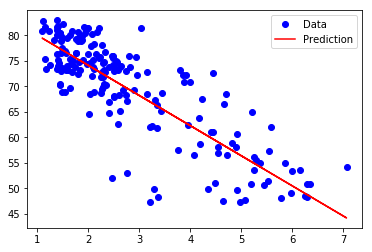

In [20]:
import tensorflow as tf
import os
import gzip
import shutil
import struct
import urllib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = r'birth_life_2010.txt'
text = open(filename, 'r').readlines()[1:]
data = [line[:-1].split('\t') for line in text]
births = [float(line[1]) for line in data]
lifes = [float(line[2]) for line in data]
data = list(zip(births, lifes))
n_samples = len(data)
data = np.asarray(data, dtype=np.float32)


X = tf.placeholder(dtype=tf.float32, name='X')
y = tf.placeholder(dtype=tf.float32, name='y')

w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

y_pred = X * w + b
loss = tf.square(y - y_pred, name='loss')

optimizer = tf.train.AdamOptimizer(learning_rate =0.01).minimize(loss)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./linear_reg', s.graph)
    for i in range(500):
        loss_t = 0
        for x1,y1 in data:
            _, l = s.run([optimizer, loss], feed_dict={X:x1, y:y1})
            loss_t += l
        if (i%100 == 0):    
            print('Epoch {} : Loss = {}'.format(i,loss_t))
    writer.close()
    wo,bo = s.run([w,b])

X,y = data.T[0], data.T[1]
plt.plot(X, y, 'bo', label='Data')
plt.plot(X, X*wo+bo,'r',label='Prediction')
plt.legend()
plt.show()
    

## Huber Loss

In [10]:
def HuberLoss(labels, predictions, delta=14.0):
    residual = tf.abs(predictions-labels)
#     condition = tf.less(residual, delta)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

Epoch 0 : Loss = 156352.23376464844
Epoch 100 : Loss = 7373.222967833281
Epoch 200 : Loss = 2869.4511351757683
Epoch 300 : Loss = 2869.4112441173056
Epoch 400 : Loss = 2869.411639333819


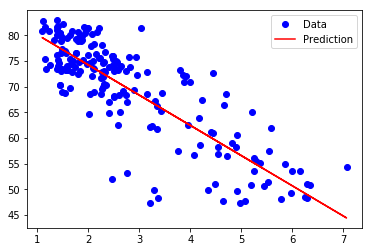

In [13]:
import tensorflow as tf
import os
import gzip
import shutil
import struct
import urllib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = r'birth_life_2010.txt'
text = open(filename, 'r').readlines()[1:]
data = [line[:-1].split('\t') for line in text]
births = [float(line[1]) for line in data]
lifes = [float(line[2]) for line in data]
data = list(zip(births, lifes))
n_samples = len(data)
data = np.asarray(data, dtype=np.float32)


X = tf.placeholder(dtype=tf.float32, name='X')
y = tf.placeholder(dtype=tf.float32, name='y')

w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

y_pred = X * w + b
loss = HuberLoss(y, y_pred)

optimizer = tf.train.AdamOptimizer(learning_rate =0.01).minimize(loss)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./linear_reg', s.graph)
    for i in range(500):
        loss_t = 0
        for x1,y1 in data:
            _, l = s.run([optimizer, loss], feed_dict={X:x1, y:y1})
            loss_t += l
        if (i%100 == 0):    
            print('Epoch {} : Loss = {}'.format(i,loss_t))
    writer.close()
    wo,bo = s.run([w,b])

X,y = data.T[0], data.T[1]
plt.plot(X, y, 'bo', label='Data')
plt.plot(X, X*wo+bo,'r',label='Prediction')
plt.legend()
plt.show()